# 1. Importing Libraries

In [147]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, precision_score,precision_recall_fscore_support, roc_auc_score, log_loss, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree


# 2. Reading Dataset

In [210]:
data = pd.read_csv("dataset.csv")
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# 3. Exploratory Data Analysis

## Dataset Overview

In [16]:
data.shape

(4424, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [5]:
pd.set_option('display.max_columns', None)
data.describe().round(3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,7.819,0.548,0.012,0.114,0.881,0.352,0.248,23.265,0.025,0.710,6.271,8.299,4.707,10.641,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,4.857,0.498,0.107,0.317,0.324,0.478,0.432,7.588,0.156,2.361,2.480,4.179,3.094,4.844,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,17.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,5.000,0.000,0.000,0.000,1.000,0.000,0.000,19.000,0.000,0.000,5.000,6.000,3.000,11.000,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,8.000,1.000,0.000,0.000,1.000,0.000,0.000,20.000,0.000,0.000,6.000,8.000,5.000,12.286,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,10.000,1.000,0.000,0.000,1.000,1.000,0.000,25.000,0.000,0.000,7.000,10.000,6.000,13.400,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,46.000,1.000,1.000,1.000,1.000,1.000,1.000,70.000,1.000,20.000,26.000,45.000,26.000,18.875,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


In [6]:
# check total null values
data.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

In [7]:
# check if values duplicated
data.duplicated().sum()

0

In [211]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

data_no_outliers = data.copy()

## Target Distribution

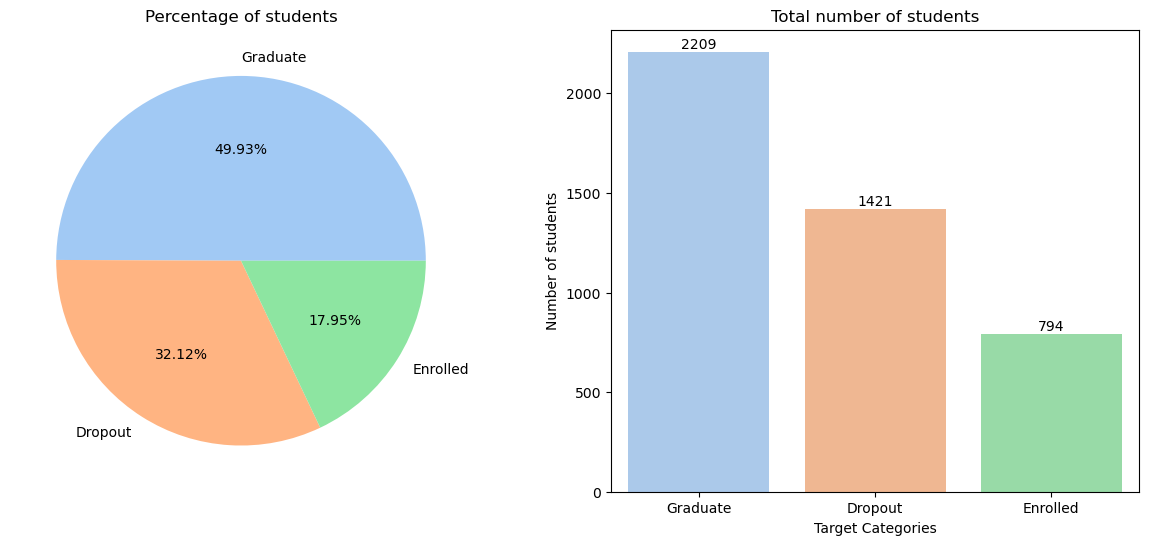

In [9]:
data_pie = data['Target'].value_counts()

label_mapping = {0: 'Dropout', 1: 'Enrolled', 2: 'Graduate'}
data_pie_labels = data_pie.index.map(label_mapping)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pie(data_pie, labels=data_pie_labels, autopct="%.2f%%", colors=sns.color_palette('pastel'))
ax1.set_title('Percentage of students')

ax2 = sns.barplot(x=data_pie_labels, y=data_pie.values, palette="pastel")
ax2.set(xlabel='Target Categories', ylabel='Number of students')
ax2.set_title('Total number of students')
ax2.bar_label(container=ax2.containers[0], labels=data_pie.values, fontsize=10, color='black')

plt.show()

### Gender

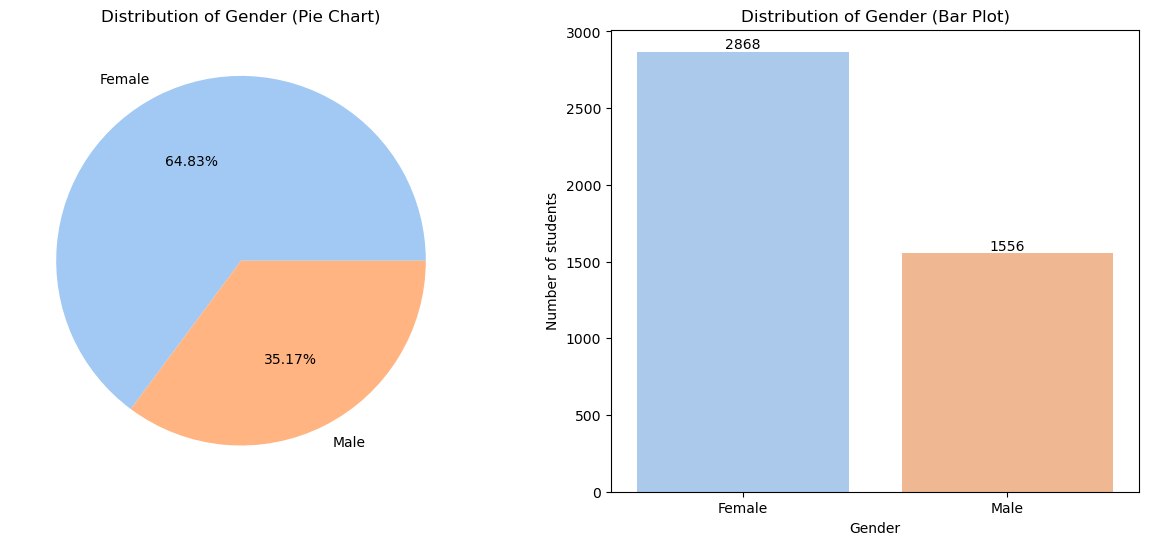

In [10]:
data_gender = data['Gender'].value_counts()

gender_mapping = {0: 'Female', 1: 'Male'}
data_gender_labels = data_gender.index.map(gender_mapping)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.pie(data_gender, labels=data_gender_labels, autopct="%.2f%%", colors=sns.color_palette('pastel'))
ax1.set_title('Distribution of Gender (Pie Chart)')

ax2 = sns.barplot(x=data_gender_labels, y=data_gender.values, palette="pastel")
ax2.set(xlabel='Gender', ylabel='Number of students')
ax2.set_title('Distribution of Gender (Bar Plot)')

ax2.bar_label(container=ax2.containers[0], labels=data_gender.values, fontsize=10, color='black')

plt.show()

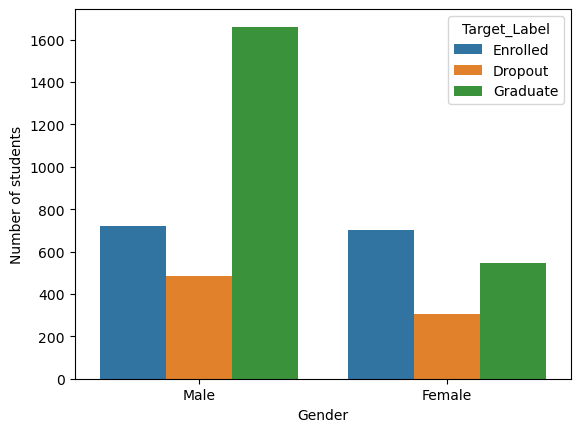

In [11]:
target_labels = {0: 'Enrolled', 1: 'Dropout', 2: 'Graduate'}
data['Target_Label'] = data['Target'].map(target_labels)

sns.countplot(data=data, x='Gender', hue='Target_Label', order=[0, 1], hue_order=['Enrolled', 'Dropout', 'Graduate'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.ylabel('Number of students')
plt.show()

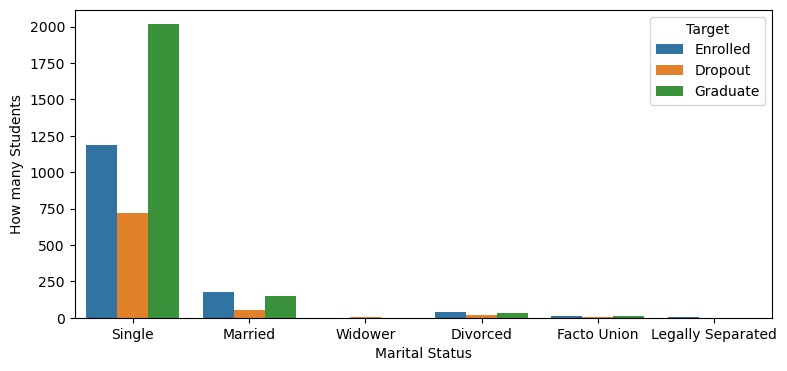

In [12]:
plt.figure(figsize=(9, 4))

sns.countplot(data=data, x='Marital status', hue='Target')

plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Single', 'Married', 'Widower', 'Divorced', 'Facto Union', 'Legally Separated'])
plt.xlabel('Marital Status')
plt.ylabel('How many Students')

target_labels = ['Enrolled', 'Dropout', 'Graduate']
plt.legend(title='Target', labels=target_labels)

plt.show()


# 4. Data Preprocessing

## Heatmap Correlation

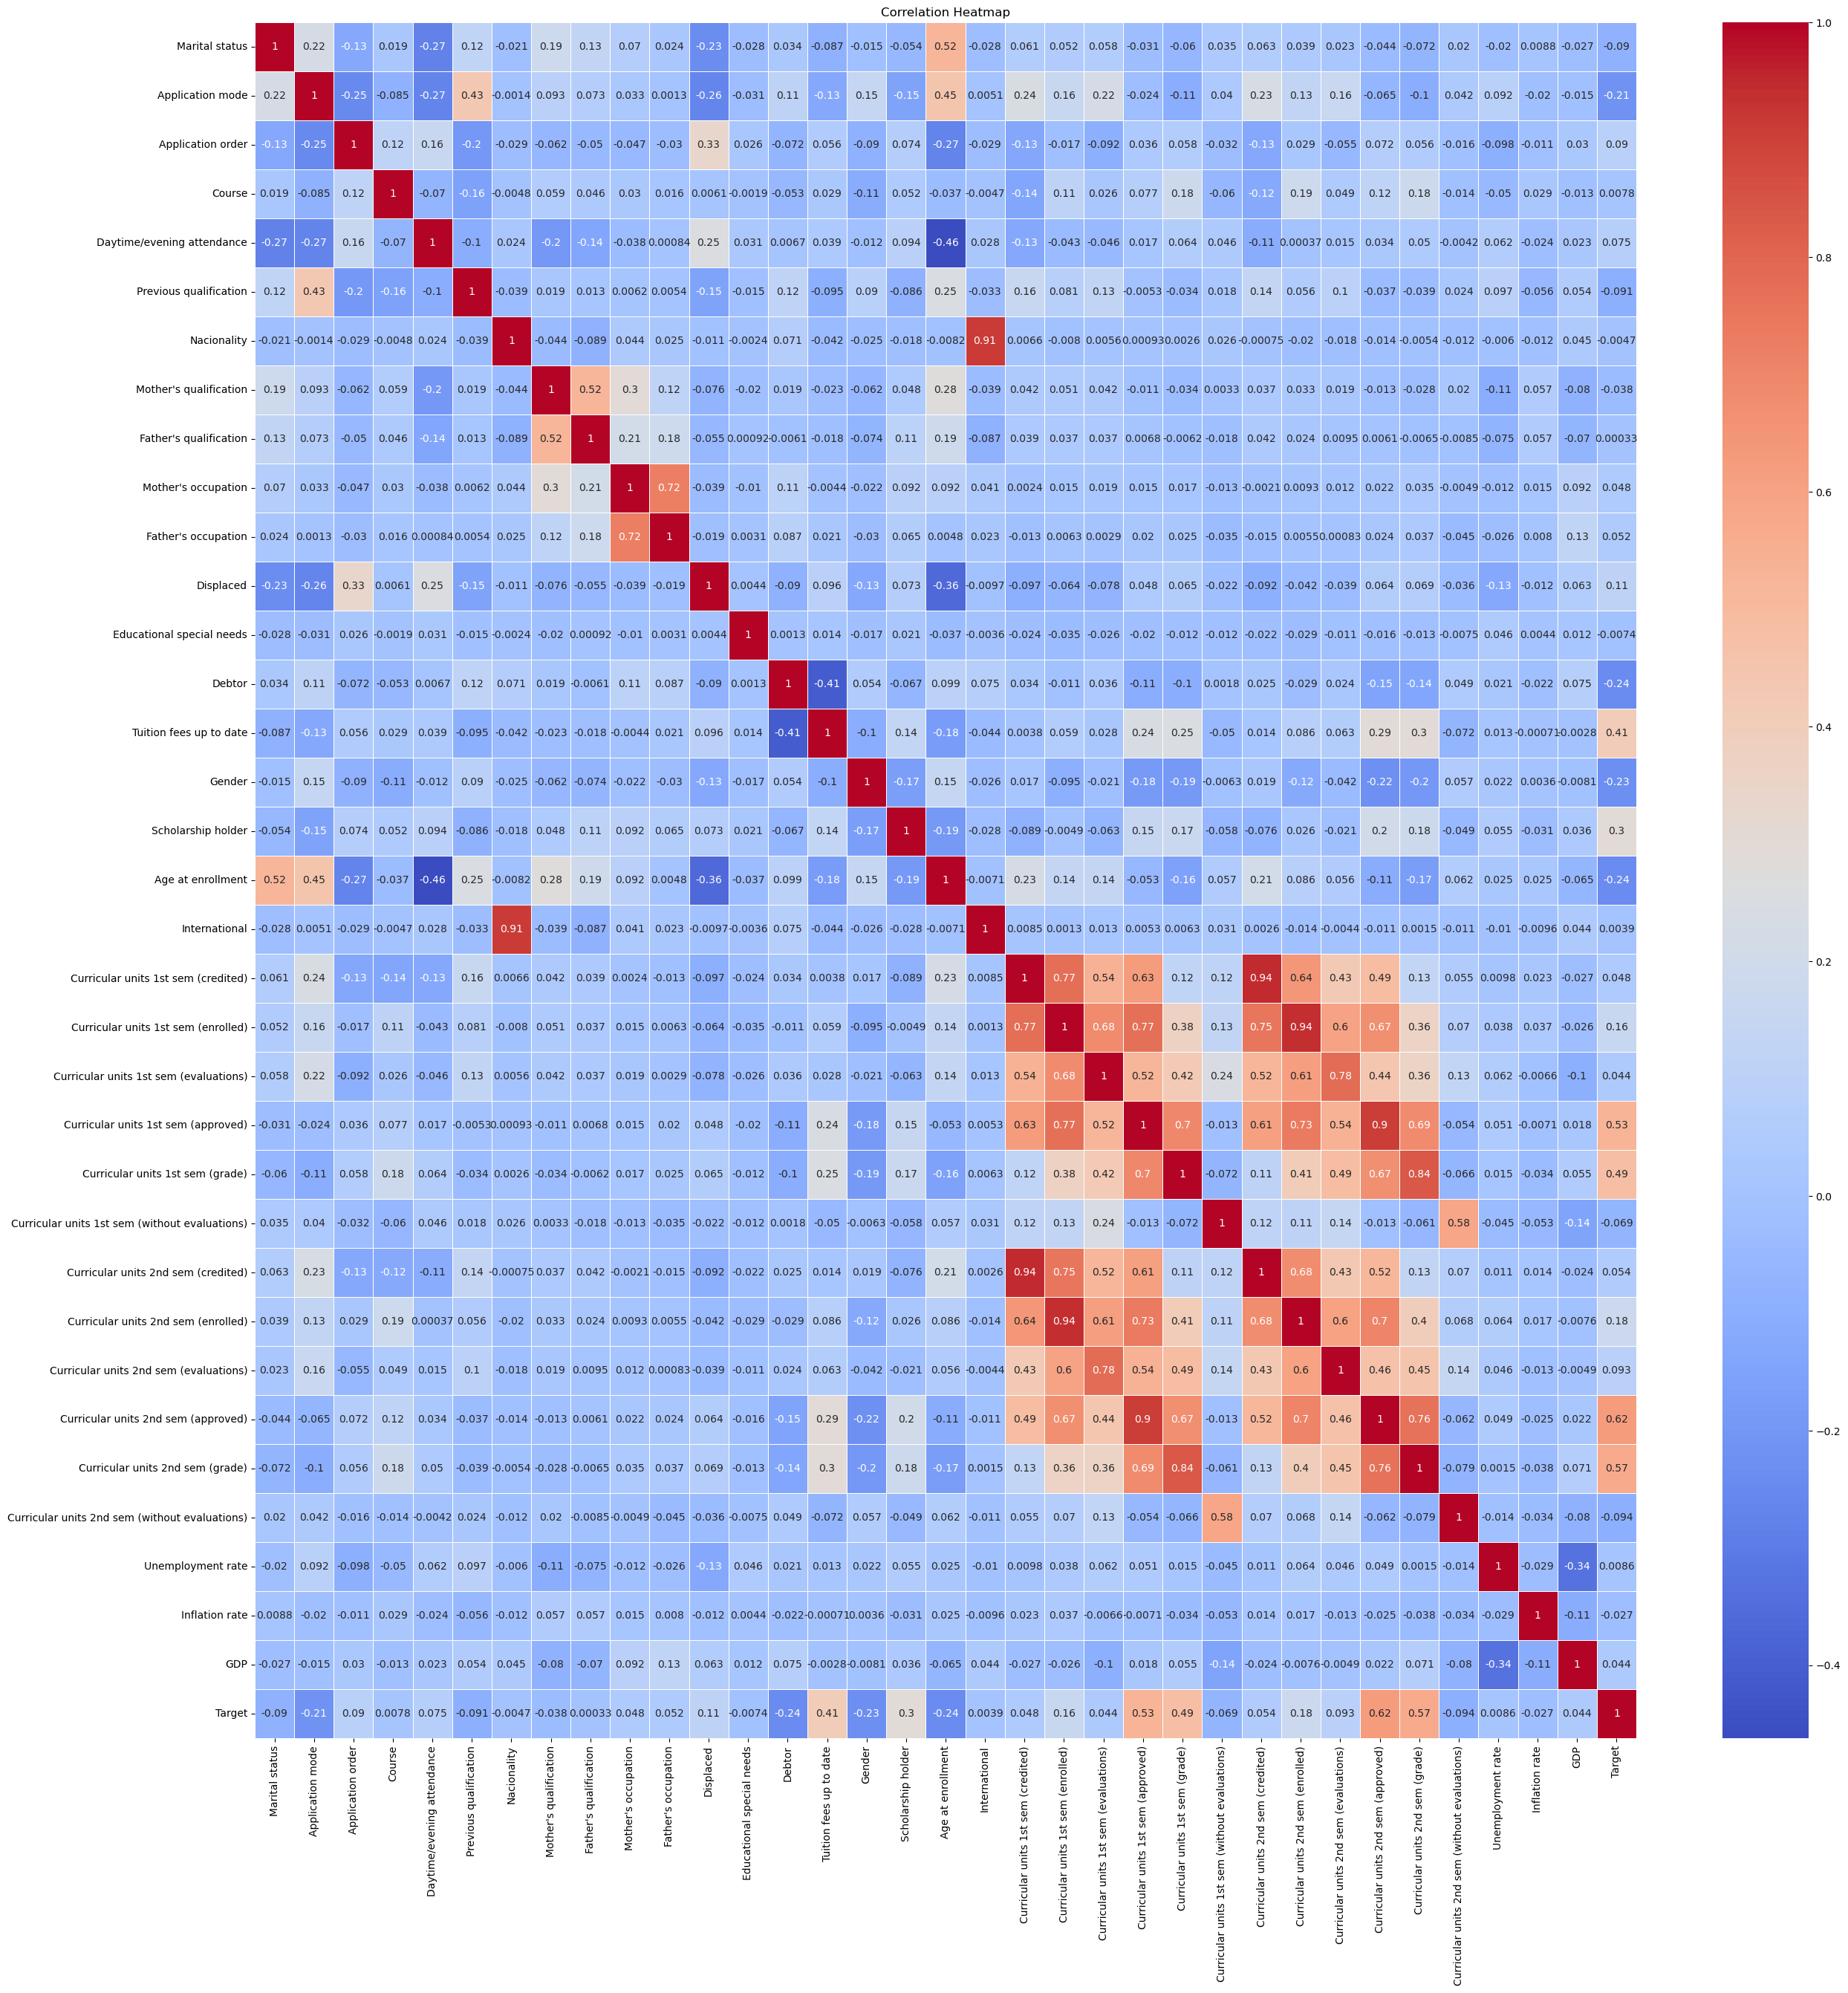

In [73]:
plt.figure(figsize=(30, 30))
sns.heatmap(data.corr() , annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

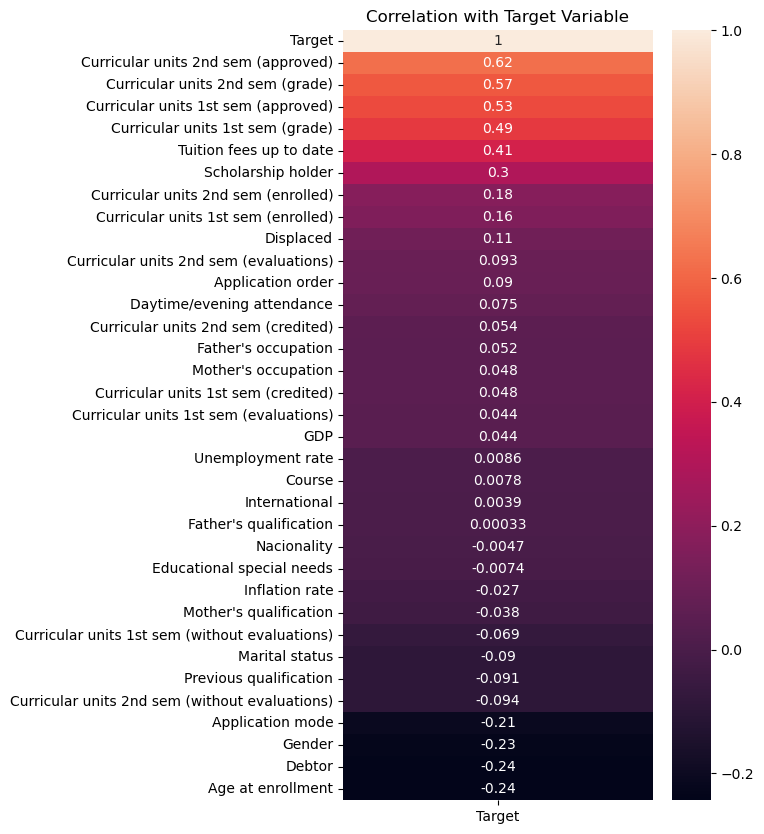

In [212]:
data_2 = data.copy()

data_2.replace("Dropout",0,inplace=True)
data_2.replace("Enrolled",1,inplace=True)
data_2.replace("Graduate",2,inplace=True)


plt.figure(figsize = (5,10))
sns.heatmap(data_2.corr()[['Target']].sort_values(by='Target', ascending=False), annot = True)
plt.title('Correlation with Target Variable')
plt.show()

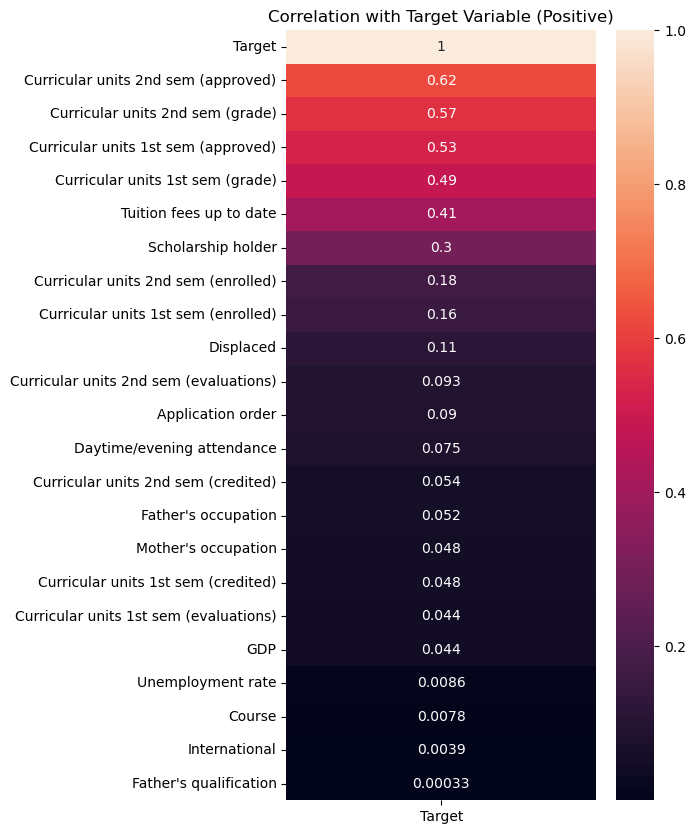

In [213]:
correlation_matrix = data_2.corr()

positive_correlation_features = correlation_matrix['Target'][correlation_matrix['Target'] > 0].index

data_no_outliers = data_2[positive_correlation_features]

plt.figure(figsize=(5, 10))
sns.heatmap(data_no_outliers.corr()[['Target']].sort_values(by='Target', ascending=False), annot=True)
plt.title('Correlation with Target Variable (Positive)')
plt.show()

In [214]:
data_no_outliers.shape

(4424, 23)

## Box Plot

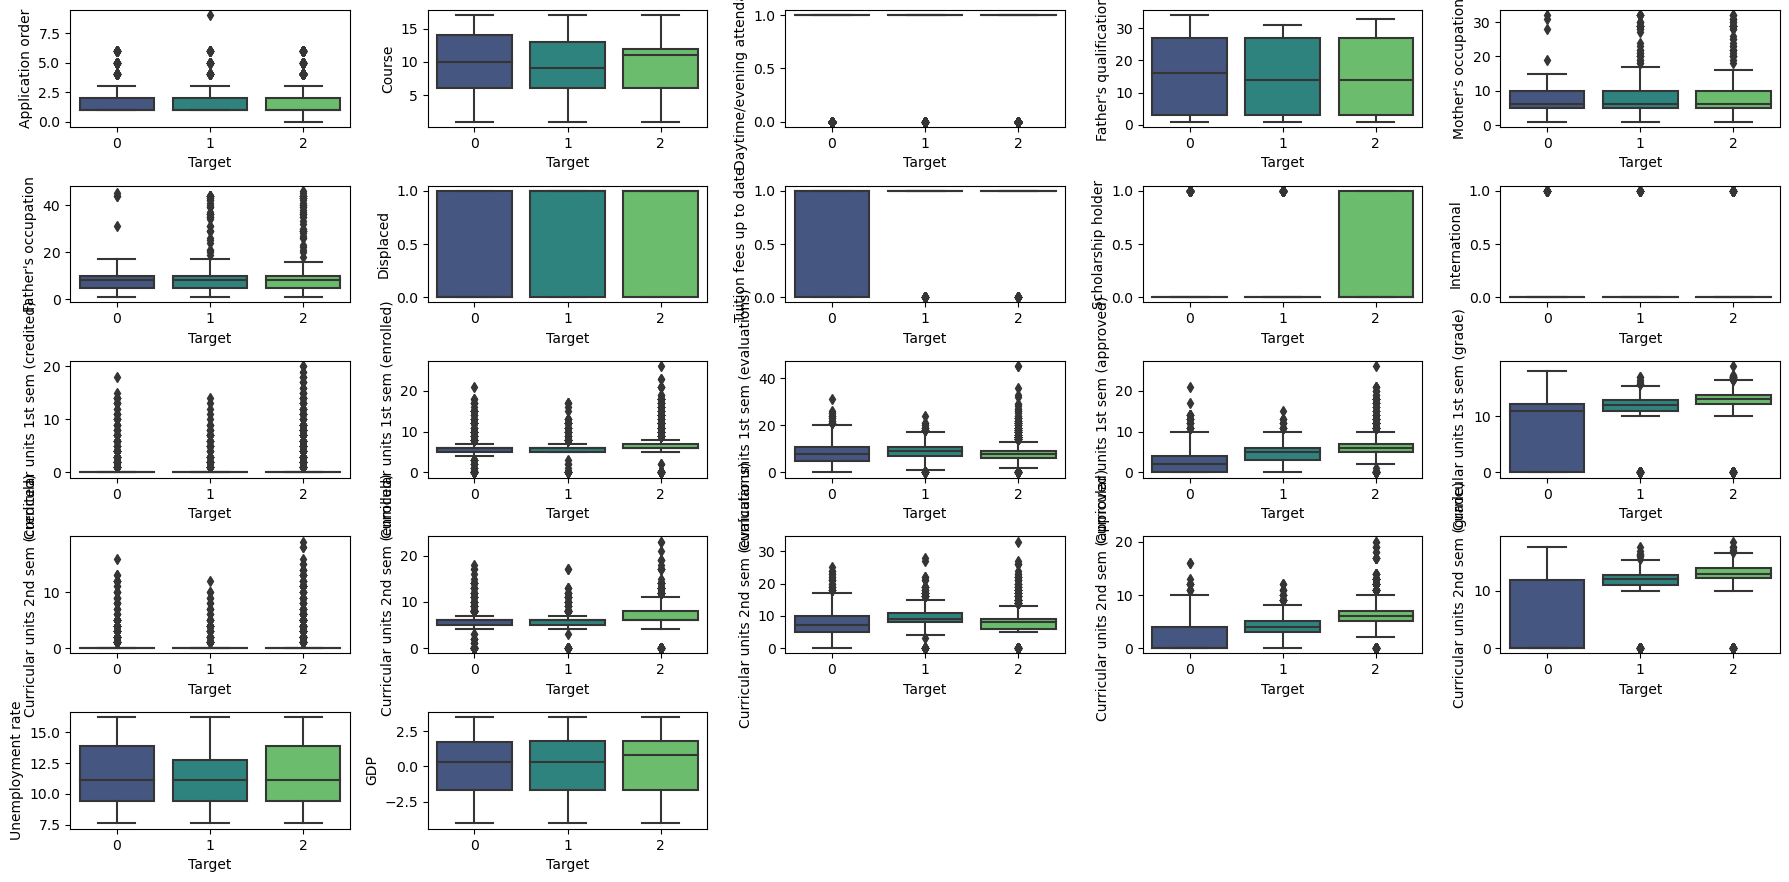

In [215]:
plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()


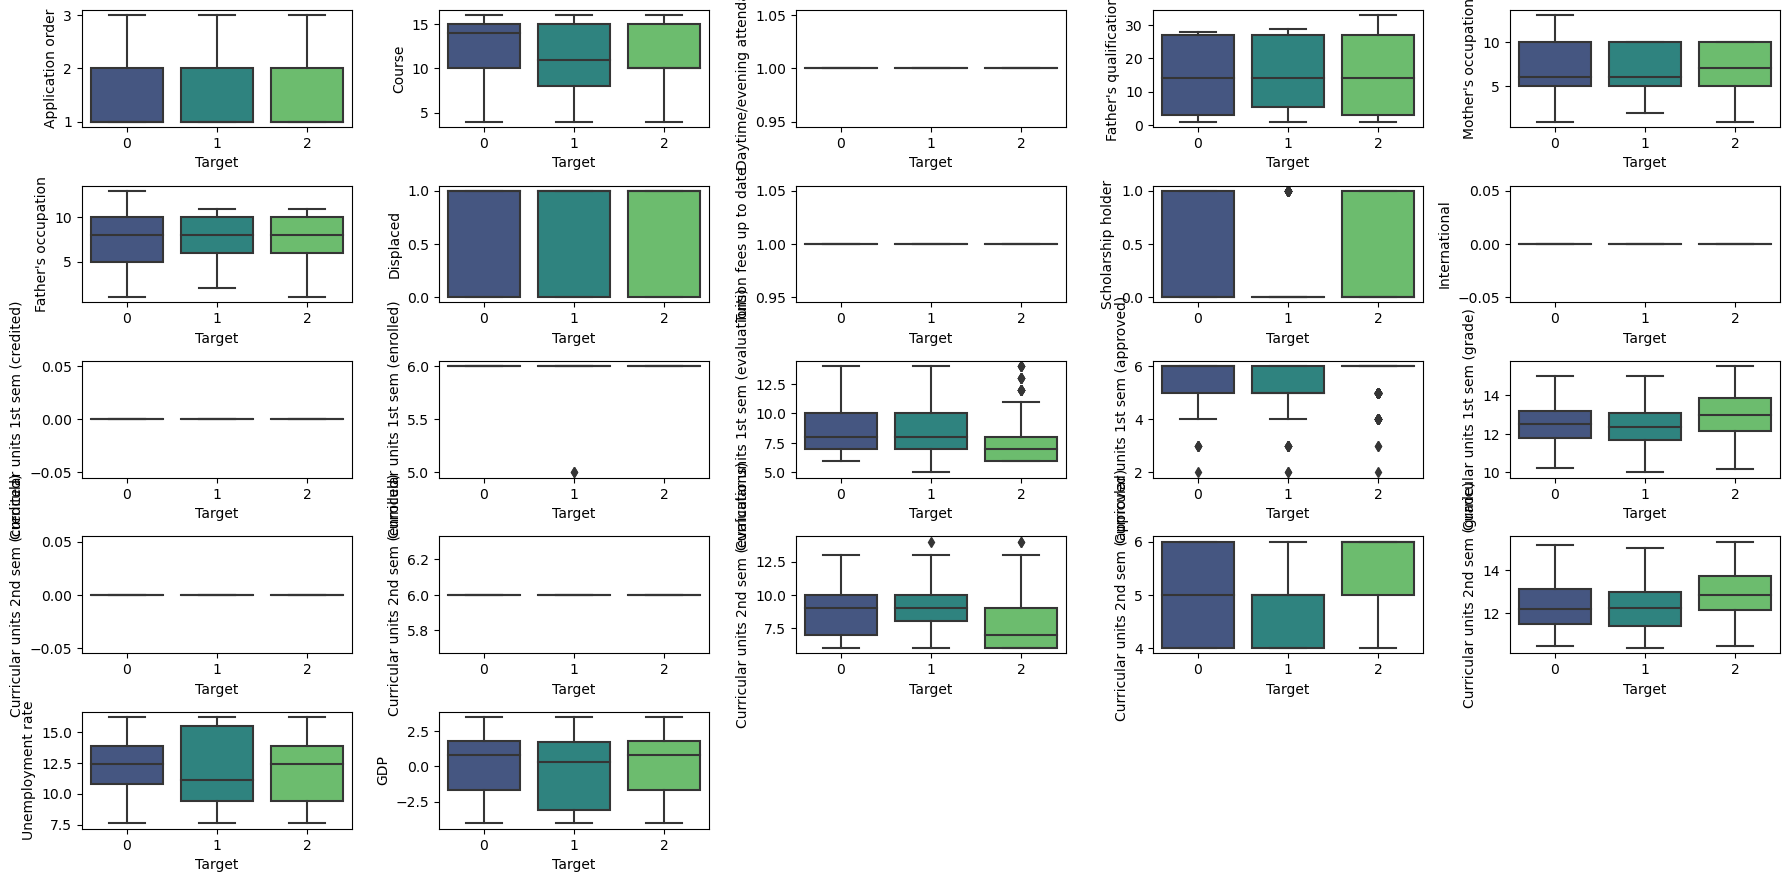

In [216]:
def remove_outliers_iqr(df, column, k):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

for col in data_no_outliers.columns[:-1]:
    data_no_outliers = remove_outliers_iqr(data_no_outliers, col, 1)

plt.figure(figsize=(18, 12))
gs = GridSpec(7, 5)

for i, col in enumerate(data_no_outliers.columns[:-1]):
    ax = plt.subplot(gs[i])
    sns.boxplot(x='Target', y=col, data=data_no_outliers, palette='viridis')
    ax.set_xlabel('Target', fontsize=10)
    ax.set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

In [217]:
data.shape

(4424, 35)

In [218]:
data_no_outliers.shape

(829, 23)

In [241]:
X = data_no_outliers.drop('Target', axis=1)
y = data_no_outliers['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Names=list(X_train.columns.values)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Model Selection and Training

In [273]:
algorithms = ['K-Nearest Neighbors', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Naive Bayes']
accuracies = []
precisions = []
recalls = []
f1_scores = []


def append_metrics(accuracy, precision, recall, f1):
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)

## 1-  K-Nearest Neighbors

Best Parameters: {'n_neighbors': 17}
Accuracy: 0.78
Precision: 0.76
Recall: 0.78
F1-score: 0.71


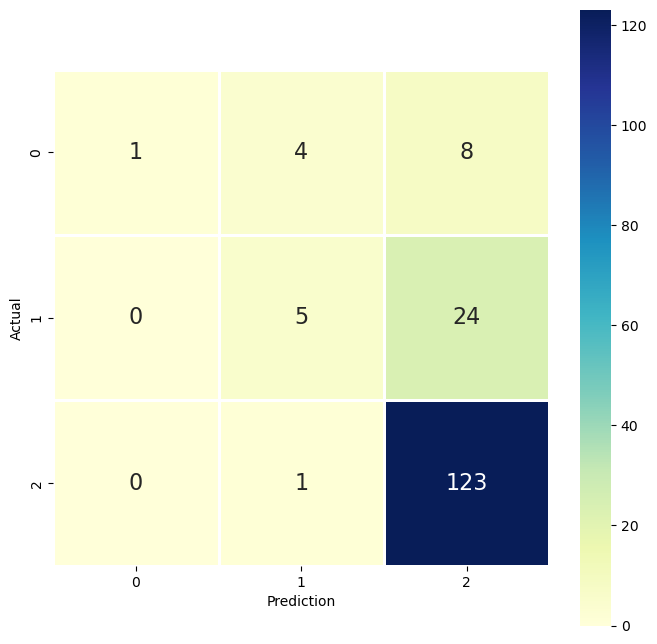

In [274]:
knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 30]}  

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)


best_knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'])
best_knn.fit(X_train, y_train)

y_pred = best_knn.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()


## 2- Logistic Regression


Best Parameters for Logistic Regression: {'C': 0.1}

Logistic Regression with Hyperparameter Tuning:
Accuracy: 0.74
Precision: 0.64
Recall: 0.74
F1-score: 0.68


C:\Users\hamza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


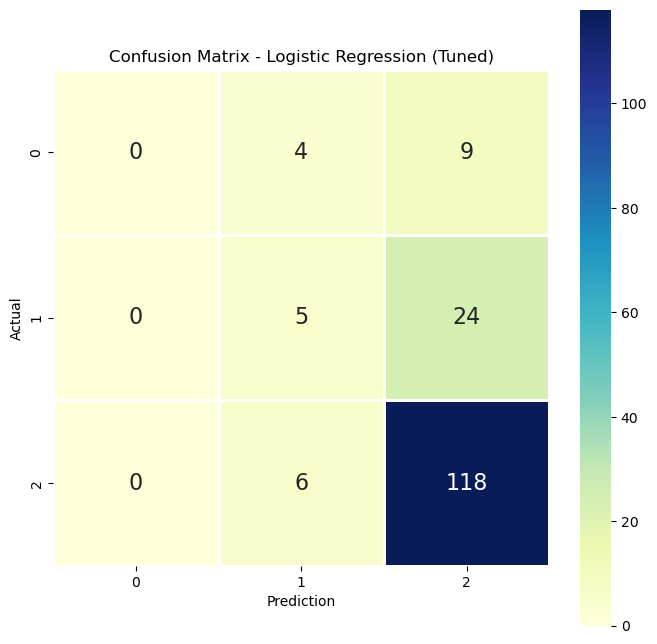

In [275]:
param_grid_logistic = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_logistic = GridSearchCV(LogisticRegression(random_state=42), param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)

best_params_logistic = grid_search_logistic.best_params_

print("\nBest Parameters for Logistic Regression:", best_params_logistic)

best_logistic_model = LogisticRegression(C=best_params_logistic['C'], random_state=42)
best_logistic_model.fit(X_train, y_train)

y_pred_logistic_tuned = best_logistic_model.predict(X_test)

accuracy_logistic_tuned = accuracy_score(y_test, y_pred_logistic_tuned)
precision_logistic_tuned, recall_logistic_tuned, f1_logistic_tuned, _ = precision_recall_fscore_support(y_test, y_pred_logistic_tuned, average='weighted')

print("\nLogistic Regression with Hyperparameter Tuning:")
print(f"Accuracy: {accuracy_logistic_tuned:.2f}")
print(f"Precision: {precision_logistic_tuned:.2f}")
print(f"Recall: {recall_logistic_tuned:.2f}")
print(f"F1-score: {f1_logistic_tuned:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm_logistic_tuned = confusion_matrix(y_test, y_pred_logistic_tuned)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_logistic_tuned, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Tuned)")
plt.show()

## 3- Decision Tree

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=auto;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=gini, max_depth=5, max_features=sqrt;, score=0

[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 2/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 3/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 4/5] END ccp_alpha=0.1, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.750 total time=   0.0s
[CV 5/5] EN

[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.750 total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=8, max_features=log2;, score=0.742 total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=auto;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 2/5] END ccp_alpha=0.01, criterion=gini, max_depth=9, max_features=sqrt;, score=0.744 total time=   0.0s
[CV 3/5] END ccp_alpha=0.01, 

[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.684 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.773 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=sqrt;, score=0.689 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.744 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.737 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.684 total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.773 total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=gini, max_depth=5, max_features=log2;, score=0.689 total time=   0.0s
[CV 1/5] E

[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=6, max_features=log2;, score=0.727 total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 4/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 5/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=auto;, score=nan total time=   0.0s
[CV 1/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.684 total time=   0.0s
[CV 2/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.722 total time=   0.0s
[CV 3/5] END ccp_alpha=0.001, criterion=entropy, max_depth=7, max_features=sqrt;, score=0.684 total time= 

C:\Users\hamza\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
150 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hamza\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hamza\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\hamza\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\hamza\anaconda3\Lib\site-packag

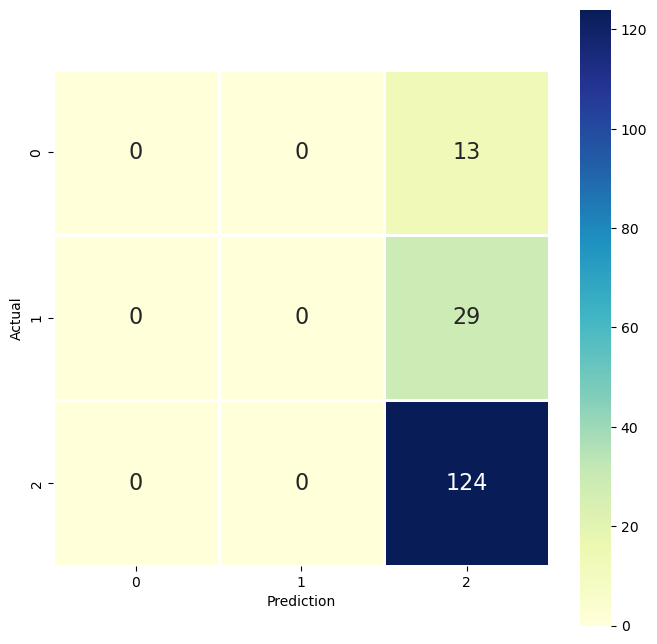

In [276]:
tree_clas = DecisionTreeClassifier(random_state=1024)
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']}
grid_search = GridSearchCV(tree_clas, param_grid, cv=5, scoring='accuracy', refit = True, verbose = 3)
grid_search.fit(X_train, y_train)

best_params_tree_clas = grid_search.best_params_
print("Best Parameters:", best_params_tree_clas)

best_tree_clas = DecisionTreeClassifier(max_features=best_params_tree_clas['max_features'], ccp_alpha=best_params_tree_clas['ccp_alpha'], max_depth=best_params_tree_clas['max_depth'], criterion=best_params_tree_clas['criterion'] )
best_tree_clas.fit(X_train, y_train)

y_pred = best_tree_clas.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

## 4- Random Forest

Best Parameters: {'max_depth': 30, 'n_estimators': 150}


C:\Users\hamza\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.78
Precision: 0.69
Recall: 0.78
F1-score: 0.72


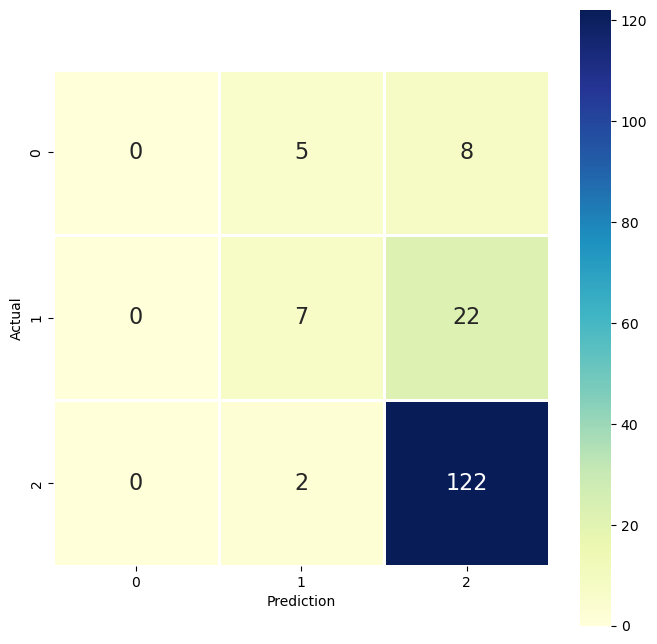

In [277]:
rf = RandomForestClassifier()
param_grid = {'n_estimators': [50, 100, 150, 200], 'max_depth': [5, 10, 20, 30]}
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_rf = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'])
best_rf.fit(X_train, y_train)

y_pred = best_rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)

ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.show()

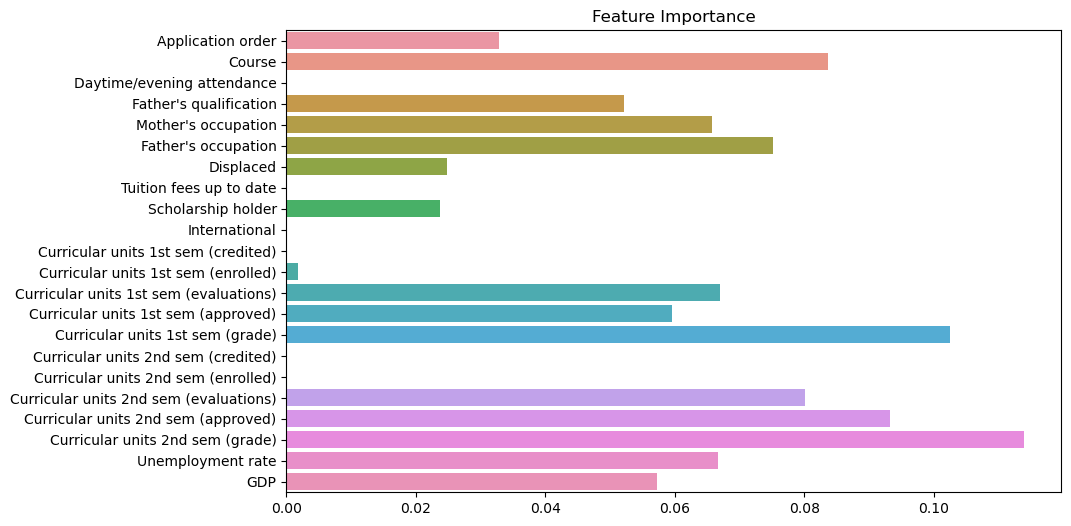

In [265]:
feature_importances = best_rf.feature_importances_
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=X.columns)
plt.title("Feature Importance")
plt.show()

## 5- SVM

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.639 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.737 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.684 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.659 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.629 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

[CV 2/5] END .........C=10, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 3/5] END .........C=10, gamma=1, kernel=rbf;, score=0.744 total time=   0.0s
[CV 4/5] END .........C=10, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END .........C=10, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 1/5] END ........C=10, gamma=1, kernel=poly;, score=0.639 total time=   0.0s
[CV 2/5] END ........C=10, gamma=1, kernel=poly;, score=0.737 total time=   0.0s
[CV 3/5] END ........C=10, gamma=1, kernel=poly;, score=0.684 total time=   0.0s
[CV 4/5] END ........C=10, gamma=1, kernel=poly;, score=0.659 total time=   0.0s
[CV 5/5] END ........C=10, gamma=1, kernel=poly;, score=0.629 total time=   0.0s
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 4/5] END .......C=10, ga

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.750 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.742 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=1, kernel=poly;, score=0.639 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=1, kernel=poly;, score=0.737 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=1, kernel=poly;, score=0.684 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=1, kernel=poly;, score=0.659 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=1, kernel=poly;, score=0.629 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.797 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.707 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.720 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.659 total time=   0.0s
[CV 1/5] END ....C=1000, gam

<Axes: >

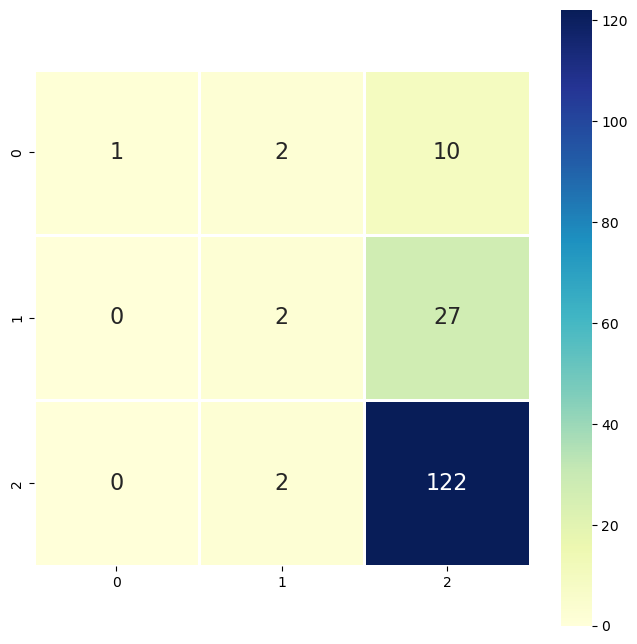

In [278]:
svcC = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf', 'poly']}
grid_search = GridSearchCV(svcC, param_grid, cv=5, scoring='accuracy', refit=True, verbose=3)
grid_search.fit(X_train, y_train)

best_params_SVC = grid_search.best_params_
print("Best Parameters:", best_params_SVC)

best_svcC = SVC(gamma=best_params_SVC['gamma'], kernel=best_params_SVC['kernel'], C=best_params_SVC['C'])
best_svcC.fit(X_train, y_train)

y_pred = best_svcC.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)


## 6-  Naive Bayes

Naive Bayes Classification:
Accuracy: 0.71
Precision: 0.82
Recall: 0.71
F1-score: 0.68


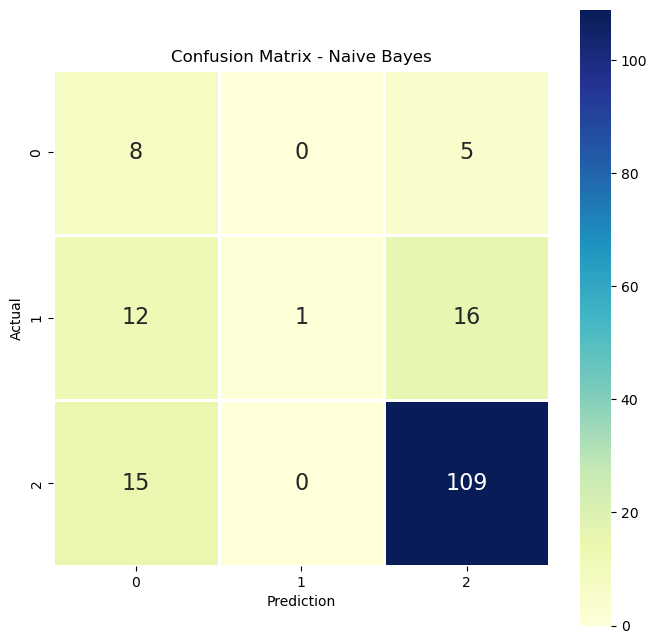

In [279]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)


y_pred_naive_bayes = naive_bayes_model.predict(X_test)


accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
precision_naive_bayes, recall_naive_bayes, f1_naive_bayes, _ = precision_recall_fscore_support(y_test, y_pred_naive_bayes, average='weighted')

print("Naive Bayes Classification:")
print(f"Accuracy: {accuracy_naive_bayes:.2f}")
print(f"Precision: {precision_naive_bayes:.2f}")
print(f"Recall: {recall_naive_bayes:.2f}")
print(f"F1-score: {f1_naive_bayes:.2f}")

append_metrics(accuracy, precision, recall, f1)

cm_naive_bayes = confusion_matrix(y_test, y_pred_naive_bayes)
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(cm_naive_bayes, fmt=".0f", cmap="YlGnBu", linewidth=1, square=True, annot=True, annot_kws={"fontsize": 16}, ax=ax)
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()



# 7. Model Evaluation and Comparison

In [280]:
results_df = pd.DataFrame({
    'Algorithm': algorithms,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1': f1_scores
})

In [281]:
results_df

,Algorithm,Accuracy,Precision,Recall,F1
0,K-Nearest Neighbors,0.777108,0.758434,0.777108,0.714617
1,Logistic Regression,0.777108,0.758434,0.777108,0.714617
2,Decision Tree,0.746988,0.557991,0.746988,0.638803
3,Random Forest,0.777108,0.686906,0.777108,0.717259
4,SVM,0.753012,0.709707,0.753012,0.675199
5,Naive Bayes,0.753012,0.709707,0.753012,0.675199
